In [80]:
# import package for 

import pandas as pd;
import numpy as np;
import seaborn as sn;
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [3]:
# import Apple stock data from csv

df = pd.read_csv("AAPL.csv")

In [4]:
# visualize the dataframe
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-10,220.949997,221.850006,216.470001,218.330002,214.993759,39516500
1,2018-09-11,218.009995,224.300003,216.559998,223.850006,220.429443,35749000
2,2018-09-12,224.940002,225.000000,219.839996,221.070007,217.691925,49278700
3,2018-09-13,223.520004,228.350006,222.570007,226.410004,222.950317,41706400
4,2018-09-14,225.750000,226.839996,222.520004,223.839996,220.419571,31999300


C:\Users\kids1\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


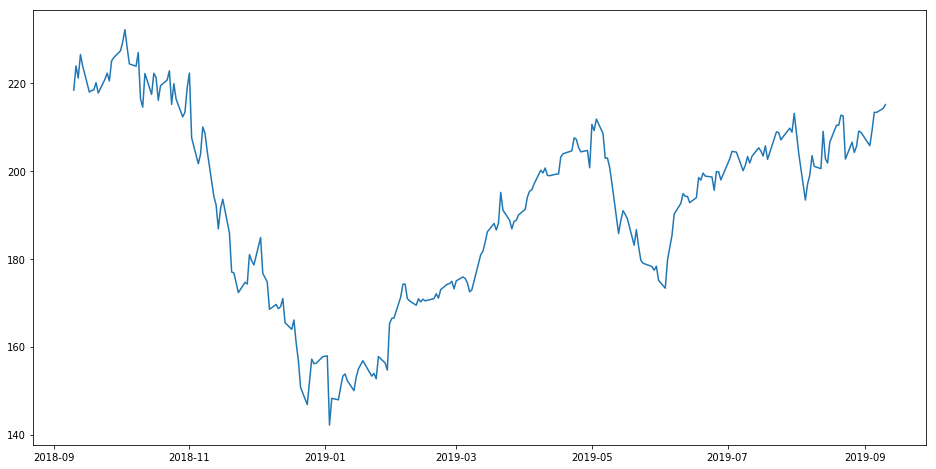

In [5]:
# Visualize the stock price data
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-09-10 to 2019-09-10
Data columns (total 7 columns):
Date         252 non-null datetime64[ns]
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 15.8 KB


In [14]:
df.index = df['Date']
df = df.sort_index(ascending = True, axis=0)
data = df[['Date', 'Close']]
data.reset_index(drop=True,inplace=True)

In [15]:
data.tail()

,Date,Close
247,2019-09-04,209.190002
248,2019-09-05,213.279999
249,2019-09-06,213.259995
250,2019-09-09,214.169998
251,2019-09-10,215.044998


In [16]:
# Extract the day of the week, the month, and day of the month from the date data
# These three metrics will be used to predict the stock price

data['dayofweek'] = data['Date'].dt.dayofweek
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

C:\Users\kids1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\kids1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\kids1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [30]:
# add three metrics based on the stock price in the past 
data['increasingday'] = 0
data['decreasingday'] = 0
data['minusaverage'] = 0
n = 0
m = 0
sum_price = 0
for i in range(len(data)-1):
    sum_price += data['Close'][i]
    #print(sum_price)
    if i >=1:
        avg = sum_price/(i+1)
        if data['Close'][i-1] <= data['Close'][i] and n >=0:
            n += 1        
        else:
            n = 0 
        data['increasingday'][i+1] =n
        if data['Close'][i-1] >= data['Close'][i] and m >=0:
            m += 1
        else:
            m = 0 
        data['decreasingday'][i+1] =m
        data['minusaverage'][i+1] = data['Close'][i]-avg

C:\Users\kids1\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\kids1\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\kids1\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [31]:
data.head()

,Date,Close,dayofweek,month,day,increasingday,decreasingday,minusaverage
0,2018-09-10,218.330002,0,9,10,0,0,0
1,2018-09-11,223.850006,1,9,11,0,0,0
2,2018-09-12,221.070007,2,9,12,1,0,2
3,2018-09-13,226.410004,3,9,13,0,1,0
4,2018-09-14,223.839996,4,9,14,1,0,3


In [32]:
data.tail()

,Date,Close,dayofweek,month,day,increasingday,decreasingday,minusaverage
247,2019-09-04,209.190002,2,9,4,0,2,13
248,2019-09-05,213.279999,3,9,5,1,0,17
249,2019-09-06,213.259995,4,9,6,2,0,21
250,2019-09-09,214.169998,0,9,9,0,1,21
251,2019-09-10,215.044998,1,9,10,1,0,21


In [33]:
# split the data into training and testing data
train = data[:202]
test = data[202:]
print(len(train))
print(len(test))

202
50


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

In [36]:
# Scale the X so that everyone can have the same distribution for linear regression
x_train = preprocessing.scale(np.array(train.drop(['Close', 'Date'], axis =1)))
y_train = train['Close']
x_test = preprocessing.scale(np.array(test.drop(['Close', 'Date'], axis =1)))
y_test = test['Close']

C:\Users\kids1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kids1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [39]:
# Linear regression
clfreg1 = LinearRegression(n_jobs=-1)
clfreg1.fit(x_train, y_train)

# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(x_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(x_train, y_train)

# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=5)
clfknn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [40]:
confidencereg1 = clfreg1.score(x_test, y_test)
confidencepoly2 = clfpoly2.score(x_test,y_test)
confidencepoly3 = clfpoly3.score(x_test,y_test)
confidenceknn = clfknn.score(x_test, y_test)

In [42]:
# results
print('The linear regression confidence is ', confidencereg1)
print('The quadratic regression 2 confidence is ', confidencepoly2)
print('The quadratic regression 3 confidence is ', confidencepoly3)
print('The knn regression confidence is ', confidenceknn)

The linear regression confidence is  -31.52173677504959
The quadratic regression 2 confidence is  -67.7537042582215
The quadratic regression 3 confidence is  -36.59228155012378
The knn regression confidence is  -18.165877213189074


C:\Users\kids1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\kids1\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0,0.5,'stock price')

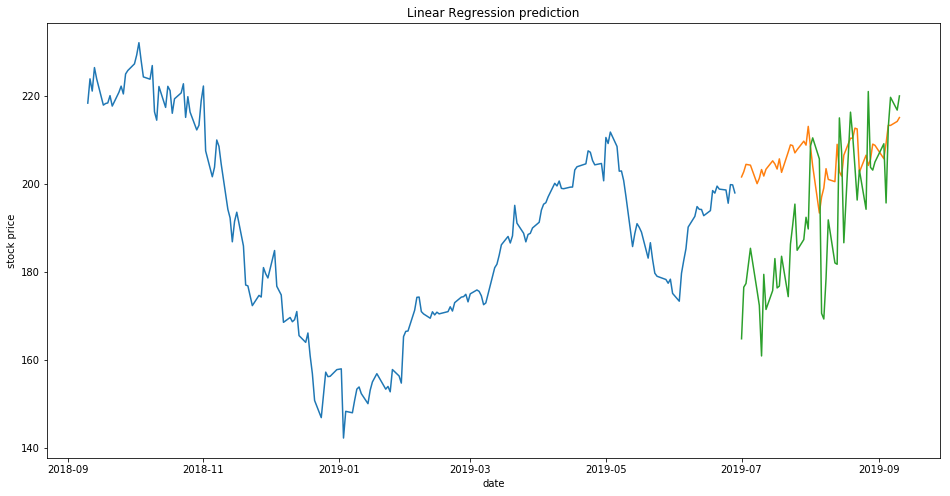

In [55]:
#plot
train.index = train['Date']
test.index = test['Date']
preds_lr = clfreg1.predict(x_test)
test['LRPredictions'] = 0
test['LRPredictions'] = preds_lr

plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(test[['Close', 'KNNPredictions']])

plt.title('Linear Regression prediction')
plt.xlabel('date')
plt.ylabel('stock price')


C:\Users\kids1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\kids1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'stock price')

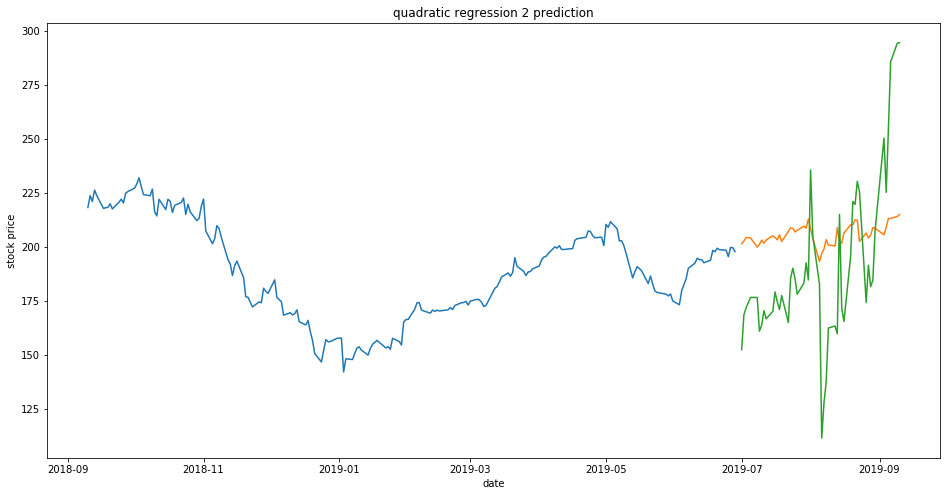

In [56]:
preds_qr2 = clfpoly2.predict(x_test)
test['QR2Predictions'] = 0
test['QR2Predictions'] = preds_qr2

plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(test[['Close',  'QR2Predictions']])

plt.title('quadratic regression 2 prediction')
plt.xlabel('date')
plt.ylabel('stock price')

C:\Users\kids1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\kids1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'stock price')

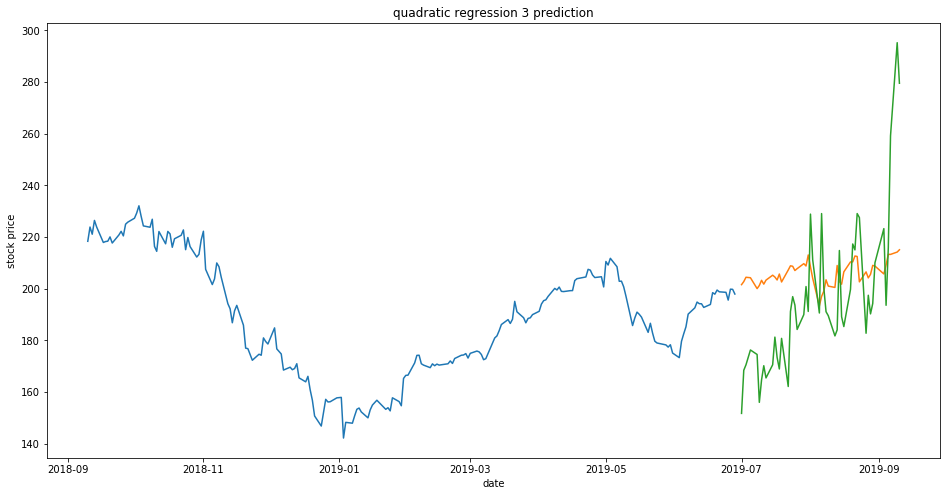

In [58]:
preds_qr3 = clfpoly3.predict(x_test)
test['QR3Predictions'] = 0
test['QR3Predictions'] = preds_qr3

plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(test[['Close',  'QR3Predictions']])

plt.title('quadratic regression 3 prediction')
plt.xlabel('date')
plt.ylabel('stock price')

C:\Users\kids1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\kids1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'stock price')

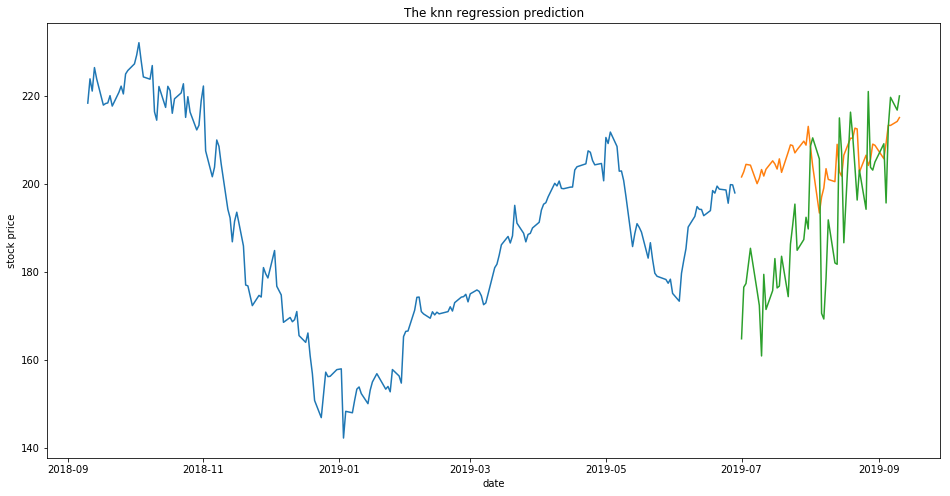

In [59]:
preds_knn = clfknn.predict(x_test)
test['KNNPredictions'] = 0
test['KNNPredictions'] = preds_knn

plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(test[['Close', 'KNNPredictions']])

plt.title('The knn regression prediction')
plt.xlabel('date')
plt.ylabel('stock price')

In [71]:
df = test[['Date','Close', 'LRPredictions', 'QR2Predictions', 'QR3Predictions', 'KNNPredictions']]

In [68]:
df.head()

,month,Close,LRPredictions,QR2Predictions,QR3Predictions,KNNPredictions
Date,,,,,,
2019-07-01,7,201.550003,150.246283,152.511216,151.729895,164.756000
2019-07-02,7,202.729996,169.849420,168.610384,168.412740,176.488001
2019-07-03,7,204.410004,172.794280,171.911865,170.535403,177.314002
2019-07-05,7,204.229996,179.776756,176.697489,176.268369,185.325998
2019-07-08,7,200.020004,181.752624,176.672792,174.526100,175.655997


C:\Users\kids1\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


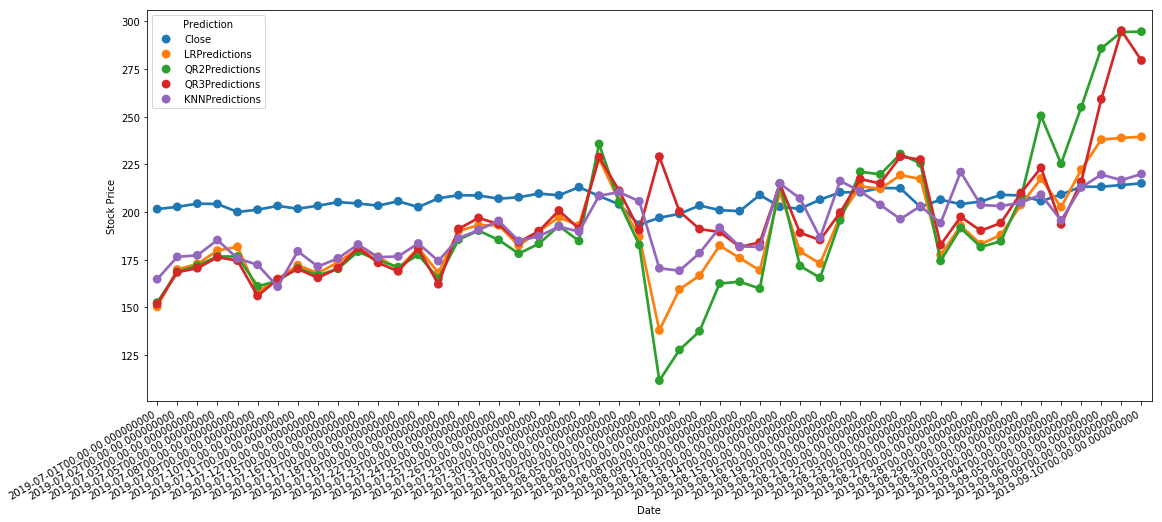

In [95]:
df_test = df.melt('Date', var_name='Prediction',  value_name='Stock Price')
fig, ax = plt.subplots(figsize=(18, 8))
sn.factorplot(x="Date", y="Stock Price", hue='Prediction', ax=ax, data=df_test)
fig.autofmt_xdate()
plt.close(2)
plt.show()


#### The results show that knn is the most accurate simple machine learning model to predict the stock price 